In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import manifold
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# Task 1
# Create a dataframe from CSV
df = pd.read_csv("dishes.csv", 
                  sep=';', 
                  names=["UserName", "Dish", "Score"])
df.reset_index()
print(df)

     UserName                     Dish  Score
0    larshaah         Pizza Napolitana      5
1    larshaah         Pizza Margherita      6
2    larshaah          Pasta Bolognese      7
3    larshaah          Pasta Carbonara      2
4    larshaah            Chicken Curry      4
..        ...                      ...    ...
895     kayan                  Bacalao      1
896     kayan                     Taco      5
897     kayan      Sweet And Sour Pork      3
898     kayan  MacDonalds Cheeseburger      5
899     kayan   Kentucky Fried Chicken      3

[900 rows x 3 columns]


In [3]:
# Finds the mean score and groups them by dish
mean = df.groupby(['Dish']).mean()
labels = mean.index.values
values = mean['Score'].values
labels


array(['Bacalao', 'Chicken Curry', 'Chicken Tikka Masala',
       'Chili Con Carne', 'Coq au vin', 'Kebab', 'Kentucky Fried Chicken',
       'Lutefisk', 'MacDonalds Cheeseburger', 'Moules frites', 'Paella',
       'Pasta Bolognese', 'Pasta Carbonara', 'Pizza Margherita',
       'Pizza Napolitana', 'Ratatouille', 'Sushi', 'Sweet And Sour Pork',
       'Taco'], dtype=object)

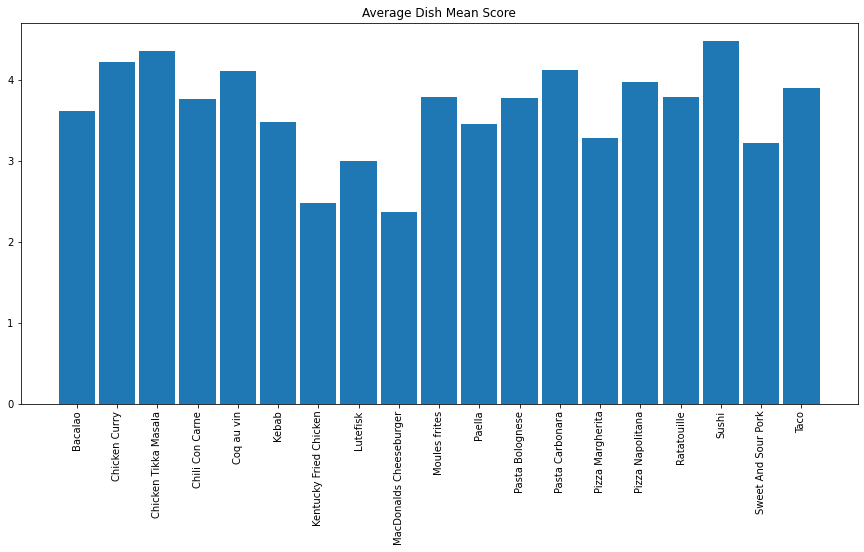

In [4]:
# Defining the length of the x-axis
x = range(len(labels))

# Set size, create plot and display plot
plt.figure(figsize=(15,7)) # Make the plot bigger
plt.bar(x, values, 0.9) # Create the plot with a little space between the bars
plt.xticks(x, labels, rotation=90)
plt.title("Average Dish Mean Score")
plt.show()

In [5]:
# Task 2
# Reshape into wide dataframe (see result from print(df.head()) )
df = df.pivot_table(index='UserName', values='Score', columns='Dish')
print(df.head())

Dish      Bacalao  Chicken Curry  Chicken Tikka Masala  Chili Con Carne  \
UserName                                                                  
anitamv       3.0            4.0                   4.0              4.0   
annedah       5.0            2.0                   2.0              1.0   
bgulbra       5.0            6.0                   6.0              5.0   
eddiebo       5.0            4.0                   3.0              3.0   
edw           6.0            5.0                   4.0              3.0   

Dish      Coq au vin  Kebab  Kentucky Fried Chicken  Lutefisk  \
UserName                                                        
anitamv          4.0    4.0                     4.0       2.0   
annedah          2.0    2.0                     1.0       1.0   
bgulbra          3.0    5.0                     1.0       1.0   
eddiebo          5.0    4.0                     4.0       1.0   
edw              5.0    1.0                     2.0       6.0   

Dish      MacDonal

In [6]:
# Compute euclidian distances between rows. Since this function uses columns,
# we invert the table using T
df = df.T # Swap rows and columns
print(df.head())
distance = lambda column1, column2: pd.np.linalg.norm((column1 - column2).fillna(0))
distances = df.apply(lambda column2: df.apply(lambda column1: distance(column1, column2)))
print(distances.head())

UserName              anitamv  annedah  bgulbra  eddiebo  edw  espenlil  \
Dish                                                                      
Bacalao                   3.0      5.0      5.0      5.0  6.0       2.0   
Chicken Curry             4.0      2.0      6.0      4.0  5.0       5.0   
Chicken Tikka Masala      4.0      2.0      6.0      3.0  4.0       5.0   
Chili Con Carne           4.0      1.0      5.0      3.0  3.0       4.0   
Coq au vin                4.0      2.0      3.0      5.0  5.0       3.0   

UserName              evend  finnks  georgsv  glenngr  ...  thomaaho  timonn  \
Dish                                                   ...                     
Bacalao                 4.0     NaN      NaN      4.0  ...       5.0     NaN   
Chicken Curry           4.0     4.0      2.0      4.0  ...       4.0     6.0   
Chicken Tikka Masala    6.0     5.0      6.0      5.0  ...       5.0     5.0   
Chili Con Carne         4.0     3.0      3.0      4.0  ...       4.0     4

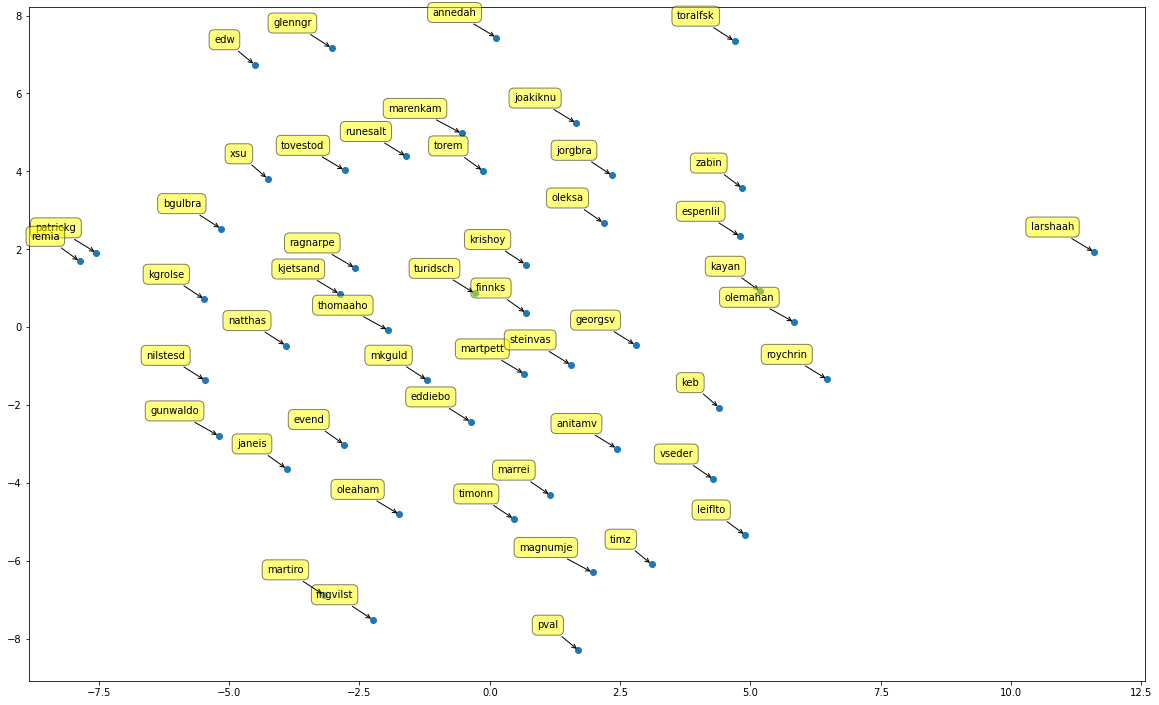

In [7]:
# Make 2-dimensional projection of distances between users
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(distances)
coords = results.embedding_
# Plot points as circles
plt.figure(figsize=(20,12))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')
# Plot 'UserName' labels
for label, x, y in zip(df.columns.values, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

In [8]:
# Find nearest neighbors by orderering by distance from "me"
me = 'larshaah'
neighbors = distances[me].drop(me, axis=0) # Remove "me" from neighbors

# Use only k-nearest neighbors
n_guests = 5
orderedNeighbors = neighbors.sort_values() # Sort. Nearest neighbor first.
orderedNeighbors.to_csv("neighbours_distances.csv")
nearestNeighbors = orderedNeighbors[0:n_guests] # Select the k first entries
print("People I will invite:")
print(nearestNeighbors)

People I will invite:
UserName
kayan        8.717798
thomaaho     9.165151
janeis       9.380832
steinvas     9.899495
finnks      10.049876
Name: larshaah, dtype: float64


In [9]:
# Task 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report

In [10]:
# Read csv-file from disk into dataframe object
df = pd.read_csv('titanic.csv', sep=',', encoding='utf-8')
print(df.head())


   Survived     Sex   Age  Class
0         0    male  22.0      3
1         1  female  38.0      1
2         1  female  26.0      3
3         1  female  35.0      1
4         0    male  35.0      3


In [11]:
# Convert non-numeric columns
cleanup_nums = {"Sex": {"male": 1, "female": 0}}
df.replace(cleanup_nums, inplace=True)
df = df[df['Age'].notnull()]
print(df.head())


   Survived  Sex   Age  Class
0         0    1  22.0      3
1         1    0  38.0      1
2         1    0  26.0      3
3         1    0  35.0      1
4         0    1  35.0      3


In [12]:
# Split the dataset vertically, so that we have the column we are predicting in y and the data in X
y = df['Survived']
X = df.drop('Survived', axis=1)
print(X.head())

   Sex   Age  Class
0    1  22.0      3
1    0  38.0      1
2    0  26.0      3
3    0  35.0      1
4    1  35.0      3


In [13]:
# We split the dataset horizontally. We use 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Grow tree, using max_depth and/or min_impurity_decrease (gini) to manipulate depth
classifier = DecisionTreeClassifier(min_impurity_decrease=0.01, max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01)

In [15]:
# Test tree
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        90
           1       0.86      0.45      0.59        53

    accuracy                           0.77       143
   macro avg       0.80      0.70      0.72       143
weighted avg       0.79      0.77      0.75       143



#### Minimal depth for decent precision 
We have experiment with different max-depth values, and we found that a depth of 3 and 2 led to predictions of similar overall precision. Depth 3 gave better precision of survivors(corresponds to 1 in the report above), than depth 2. Depths of 4 and more yielded a precision which were lower than depth of 3.

In [16]:
# Display tree
dotfile = open("./dt_titanic.dot", 'w')
tree.export_graphviz(classifier, out_file = dotfile, feature_names = X.columns, class_names=['Dead','Survives'])
dotfile.close()